# AEMO DATA
##### Source : https://aemo.com.au/energy-systems/electricity/national-electricity-market-nem/data-nem/aggregated-data

## Install Required Libraries

In [1]:
import subprocess
import sys

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'tensorflow']

for package in packages:
    try:
        __import__(package)  
    except ImportError:
        install(package)  

from IPython.display import clear_output

clear_output(wait=True)

print("All required packages are installed.")


All required packages are installed.


## Merge monthly files from AEMO  

#### Also append new monthly files from AEMO

In [2]:
import pandas as pd
import os

folder_path = '/Users/anup/Desktop/AEMO_DATA/'

merged_file_path = os.path.join(folder_path, 'Merged_PRICE_AND_DEMAND_VIC1.csv')

file_paths = [os.path.join(folder_path, f) for f in os.listdir(folder_path) 
              if f.endswith('.csv') and f != 'Merged_PRICE_AND_DEMAND_VIC1.csv']

dfs = []

if os.path.exists(merged_file_path):
    merged_df = pd.read_csv(merged_file_path)
    dfs.append(merged_df)

for file in file_paths:
    df = pd.read_csv(file)
    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

merged_df.to_csv(merged_file_path, index=False)

print(f'Merged data saved at: {merged_file_path}')


Merged data saved at: /Users/anup/Desktop/AEMO_DATA/Merged_PRICE_AND_DEMAND_VIC1.csv


## Exploratory Data Analysis

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/Users/anup/Desktop/AEMO_DATA/Merged_PRICE_AND_DEMAND_VIC1.csv'
data = pd.read_csv(file_path)

data['SETTLEMENTDATE'] = pd.to_datetime(data['SETTLEMENTDATE'])

data.head()


,REGION,SETTLEMENTDATE,TOTALDEMAND,RRP,PERIODTYPE
0,VIC1,2024-01-01 00:05:00,3977.10,51.80,TRADE
1,VIC1,2024-01-01 00:10:00,3982.35,64.27,TRADE
2,VIC1,2024-01-01 00:15:00,3965.75,52.67,TRADE
3,VIC1,2024-01-01 00:20:00,3932.93,48.78,TRADE
4,VIC1,2024-01-01 00:25:00,3904.02,49.19,TRADE


In [6]:
data.info()

data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281088 entries, 0 to 281087
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   REGION          281088 non-null  object        
 1   SETTLEMENTDATE  281088 non-null  datetime64[ns]
 2   TOTALDEMAND     281088 non-null  float64       
 3   RRP             281088 non-null  float64       
 4   PERIODTYPE      281088 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 10.7+ MB


,SETTLEMENTDATE,TOTALDEMAND,RRP
count,281088,281088.000000,281088.000000
mean,2024-05-02 00:02:30.000000256,4958.749468,103.947996
min,2024-01-01 00:05:00,1729.770000,-999.990000
25%,2024-03-02 00:03:45,4165.242500,18.650000
50%,2024-05-02 00:02:30,4823.695000,76.970000
75%,2024-07-02 00:01:15,5647.347500,144.990000
max,2024-09-01 00:00:00,9260.040000,17500.000000
std,NaN,1118.000215,462.689076


## Analyse Peak Demand Periods

/var/folders/9q/gks6hc0d4_n68vl0rvys8pgw0000gn/T/ipykernel_99753/1881868280.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_peak = data['TOTALDEMAND'].resample('M').max()


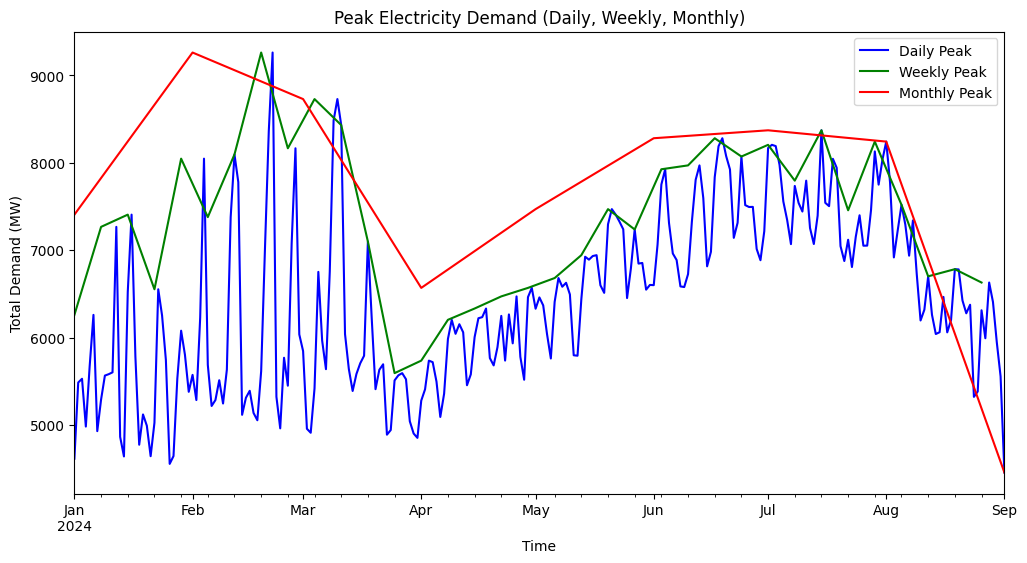

In [7]:
data.set_index('SETTLEMENTDATE', inplace=True)

daily_peak = data['TOTALDEMAND'].resample('D').max()

weekly_peak = data['TOTALDEMAND'].resample('W').max()

monthly_peak = data['TOTALDEMAND'].resample('M').max()

plt.figure(figsize=(12,6))
daily_peak.plot(label='Daily Peak', color='blue')
weekly_peak.plot(label='Weekly Peak', color='green')
monthly_peak.plot(label='Monthly Peak', color='red')
plt.title('Peak Electricity Demand (Daily, Weekly, Monthly)')
plt.ylabel('Total Demand (MW)')
plt.xlabel('Time')
plt.legend()
plt.show()


## Daily and Seasonal Demand Patterns

#### Hourly Demand (Daily Pattern)

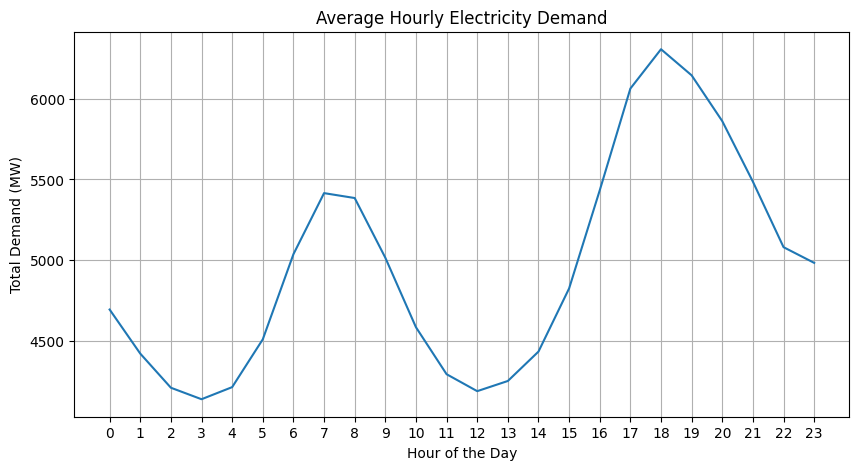

In [8]:
hourly_pattern = data.groupby(data.index.hour)['TOTALDEMAND'].mean()

plt.figure(figsize=(10,5))
hourly_pattern.plot()
plt.title('Average Hourly Electricity Demand')
plt.ylabel('Total Demand (MW)')
plt.xlabel('Hour of the Day')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


#### Weekly Demand (Day of Week Pattern)

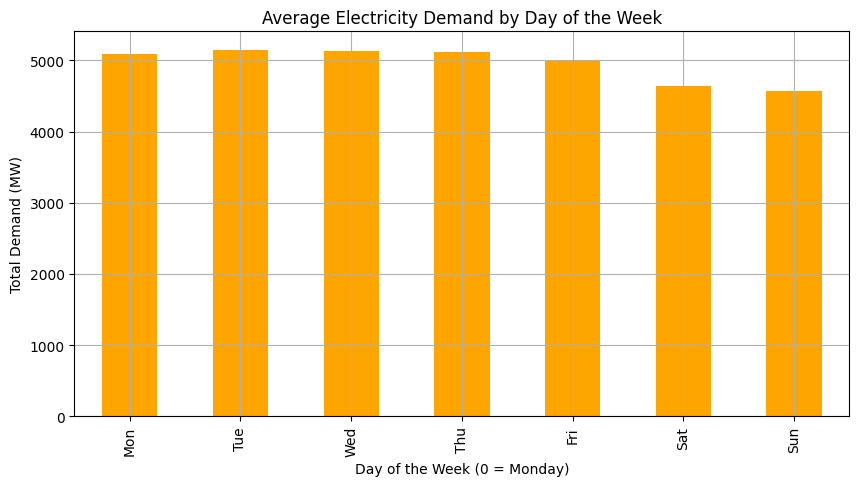

In [9]:
weekly_pattern = data.groupby(data.index.dayofweek)['TOTALDEMAND'].mean()

plt.figure(figsize=(10,5))
weekly_pattern.plot(kind='bar', color='orange')
plt.title('Average Electricity Demand by Day of the Week')
plt.ylabel('Total Demand (MW)')
plt.xlabel('Day of the Week (0 = Monday)')
plt.xticks(range(0,7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()


#### Monthly Demand (Seasonal Pattern)

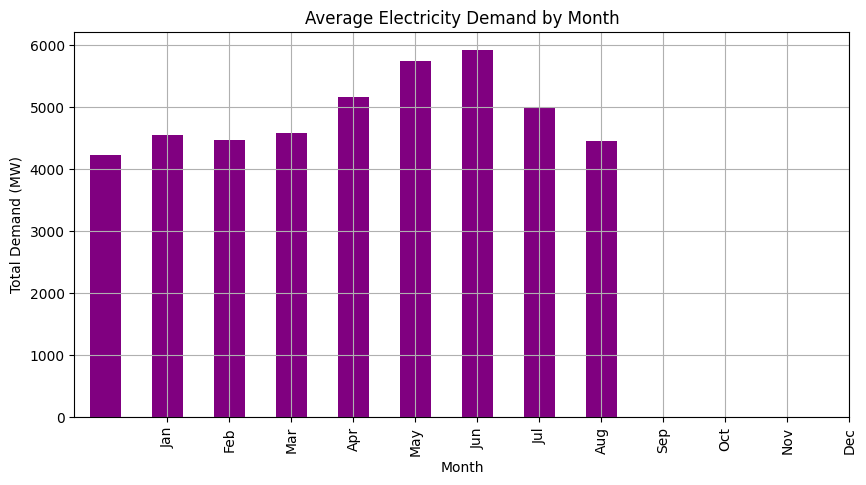

In [10]:
seasonal_pattern = data.groupby(data.index.month)['TOTALDEMAND'].mean()

plt.figure(figsize=(10,5))
seasonal_pattern.plot(kind='bar', color='purple')
plt.title('Average Electricity Demand by Month')
plt.ylabel('Total Demand (MW)')
plt.xlabel('Month')
plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


## Demand by Region

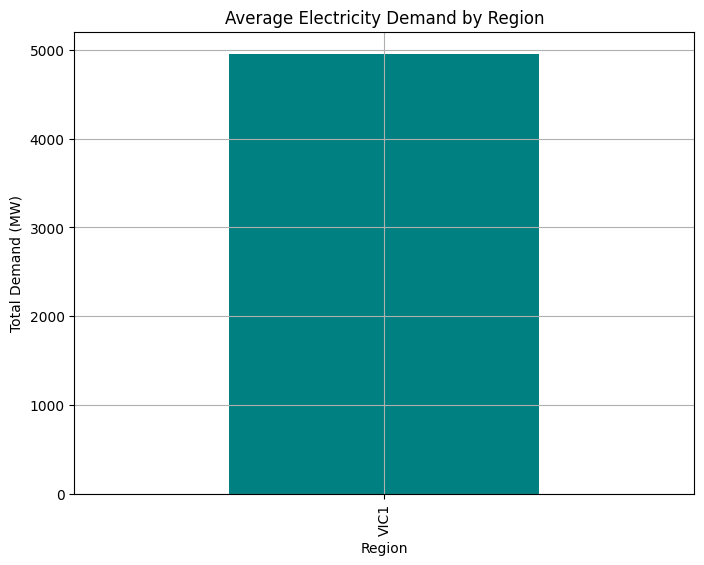

In [11]:
region_demand = data.groupby('REGION')['TOTALDEMAND'].mean()

plt.figure(figsize=(8,6))
region_demand.plot(kind='bar', color='teal')
plt.title('Average Electricity Demand by Region')
plt.ylabel('Total Demand (MW)')
plt.xlabel('Region')
plt.grid(True)
plt.show()


## Peak Load and Off-Peak Load Patterns

In [12]:
peak_load = data.between_time('17:00', '21:00')['TOTALDEMAND'].mean()

off_peak_load = data.between_time('00:00', '06:00')['TOTALDEMAND'].mean()

print(f"Average Peak Load (5 PM to 9 PM): {peak_load:.2f} MW")
print(f"Average Off-Peak Load (12 AM to 6 AM): {off_peak_load:.2f} MW")


Average Peak Load (5 PM to 9 PM): 6083.85 MW
Average Off-Peak Load (12 AM to 6 AM): 4372.61 MW
